In [1]:
#Import dependencies and read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'


df = pd.read_csv("Chicago_Licenses.csv")
df.head()

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,22308-20060816,1723393,29481,1,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,3741 S PULASKI RD 1,CHICAGO,IL,60623,...,08/16/2006,08/15/2007,08/10/2006,08/11/2006,AAI,NaN,NaN,41.825320,-87.723960,"(41.82531992987547, -87.72395999659746)"
1,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,...,05/16/2016,05/15/2018,05/18/2016,08/30/2016,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
2,2368602-20160616,2460909,291461,3,"PROJECT: VISION , INC.","PROJECT : VISION , INC",2301 S ARCHER AVE 1 1,CHICAGO,IL,60616,...,06/16/2016,06/15/2017,06/21/2016,06/22/2016,AAC,08/30/2016,NaN,41.850843,-87.638734,"(41.85084294374687, -87.63873424399071)"
3,2060891-20141016,2353257,357247,1,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1965 BERNICE RD 1 1SW,LANSING,IL,60438,...,10/16/2014,10/15/2016,04/01/2016,04/01/2016,AAI,NaN,38.0,41.951316,-87.678586,"(41.95131555606832, -87.67858578019546)"
4,1144216-20070516,1804790,147,63,WALGREEN CO.,Walgreens # 05192,9148 S COMMERCIAL AVE 1ST,CHICAGO,IL,60617,...,05/16/2007,05/15/2008,05/10/2007,05/11/2007,AAI,NaN,5.0,41.728622,-87.551366,"(41.72862173556932, -87.55136646594693)"


In [2]:
# Create new dataframe with the variables we'll use. 
df_1 = df[['LICENSE NUMBER', "LEGAL NAME", 'DOING BUSINESS AS NAME', "LICENSE CODE", "APPLICATION TYPE", "CITY", "WARD", "ZIP CODE", "DATE ISSUED", "LATITUDE", "LONGITUDE"]]
df_1.head()

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734
3,2060891.0,FOLASHADE'S CLEANING SERVICE INC.,FOLASHADE'S CLEANING SERVICE INC.,1010,RENEW,LANSING,NaN,60438,04/01/2016,41.951316,-87.678586
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366


In [3]:
df_1.shape

(958133, 11)

In [4]:
# Drop NaN values
df_1 = df_1.dropna()
df_1.shape

(880536, 11)

In [5]:
# Filter by city (Chicago) 
df_2 = df_1.query('CITY == "CHICAGO"')
df_2.head()

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366
5,2488345.0,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",4404,ISSUE,CHICAGO,15.0,60636,08/30/2016,41.789617,-87.669472


In [6]:
df_2.shape

(880450, 11)

In [7]:
# Create separate variables containing the year
df_2['YEAR'] = pd.DatetimeIndex(df_2['DATE ISSUED']).year
#df_2['MONTH'] = pd.DatetimeIndex(df_2['DATE ISSUED']).month
df_2.head()

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE,YEAR
0,22308.0,BELL OIL TERMINAL INC,Bell Oil Terminal LLC,1010,RENEW,CHICAGO,14.0,60623,08/11/2006,41.825320,-87.723960,2006
1,1620668.0,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,1010,RENEW,CHICAGO,25.0,60607,08/30/2016,41.867339,-87.641590,2016
2,2368602.0,"PROJECT: VISION , INC.","PROJECT : VISION , INC",1625,RENEW,CHICAGO,25.0,60616,06/22/2016,41.850843,-87.638734,2016
4,1144216.0,WALGREEN CO.,Walgreens # 05192,1010,RENEW,CHICAGO,10.0,60617,05/11/2007,41.728622,-87.551366,2007
5,2488345.0,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",4404,ISSUE,CHICAGO,15.0,60636,08/30/2016,41.789617,-87.669472,2016


In [8]:
df_2 = df_2[df_2.YEAR != 2019]
df_2 = df_2[df_2.YEAR != 2018]
df_2 = df_2[df_2.YEAR != 2017]
df_2 = df_2[df_2.YEAR != 2016]

Text(0.5, 1.0, 'Total New Licenses in General (2002-20015)')

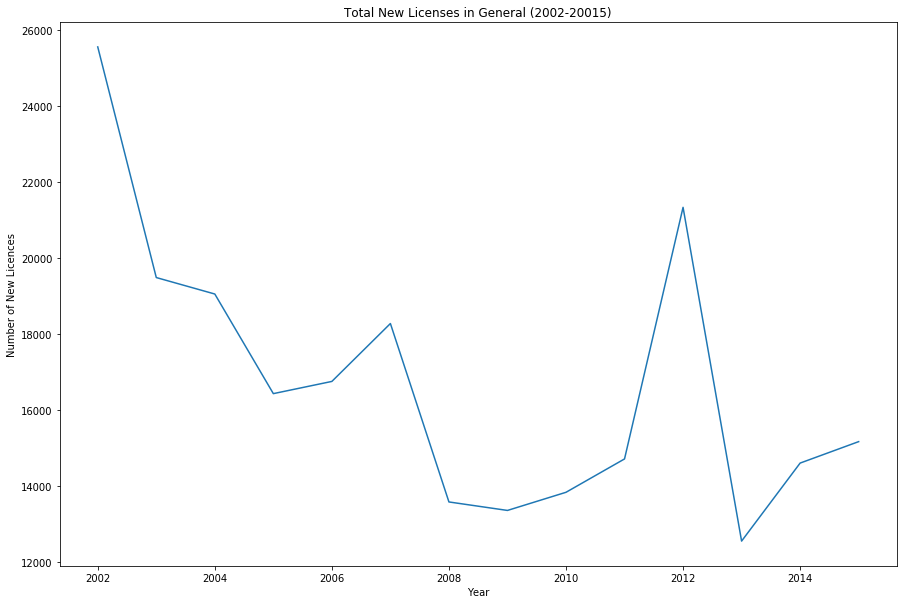

In [9]:
#Plot total number of licenses issued by year.
rcParams['figure.figsize'] = 15,10
license_number = df_2.groupby(["LICENSE NUMBER"]).first()
license_number_year = license_number.groupby(["YEAR"]).count()
plt.plot("LEGAL NAME", data=license_number_year)
plt.xlabel("Year")
plt.ylabel("Number of New Licences")
plt.title("Total New Licenses in General (2002-20015)")

In [10]:
# Filter by license code (1006 corresponds to restaurants)
df_3 = df_2[df_2['LICENSE CODE'] == 1006]
df_3 = df_3.reset_index(drop=True)
#Reamining rows
df_3.shape

(122500, 12)

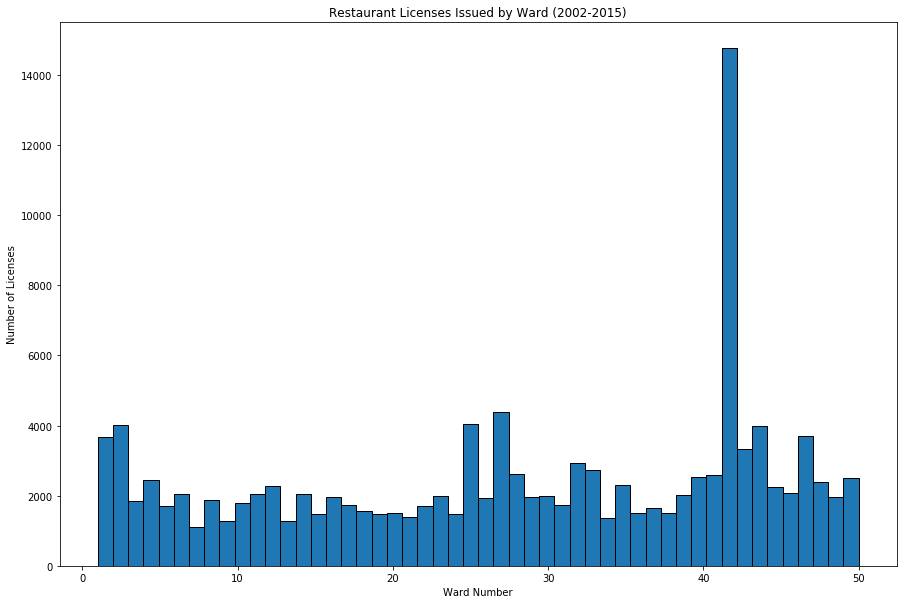

In [11]:
rcParams['figure.figsize'] = 15,10
WARD = df_3['WARD']

plt.hist(WARD, 50)

plt.xlabel('Ward Number')
plt.ylabel('Number of Licenses')
plt.title('Restaurant Licenses Issued by Ward (2002-2015)')
plt.savefig('Restaurant_Licenses_Distribution_by_Ward.png')

Text(0.5, 1.0, 'Restaurant New Licenses (2002-20015)')

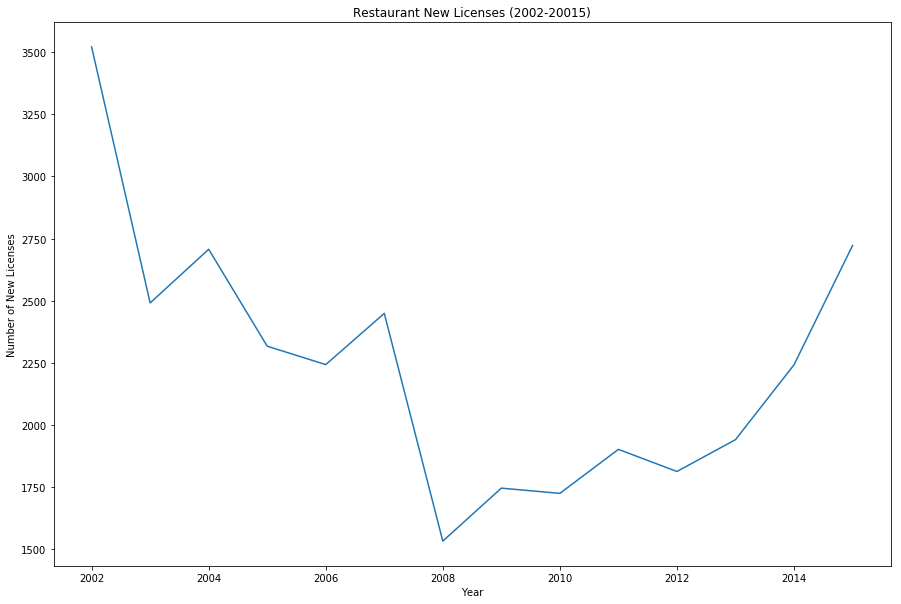

In [12]:
# Plot the number of restaurant licenses issued
rcParams['figure.figsize'] = 15,10
license_number_rest = df_3.groupby(["LICENSE NUMBER"]).first()
license_number_year1 = license_number_rest.groupby(["YEAR"]).count()
plt.plot("LEGAL NAME", data=license_number_year1)
plt.xlabel("Year")
plt.ylabel("Number of New Licenses")
plt.title("Restaurant New Licenses (2002-20015)")

In [13]:
renew = df_3[df_3['APPLICATION TYPE'] == 'RENEW']
issue = df_3[df_3['APPLICATION TYPE'] == 'ISSUE']


Text(0.5, 1.0, 'Restaurant Renewed Licenses (2002-2015)')

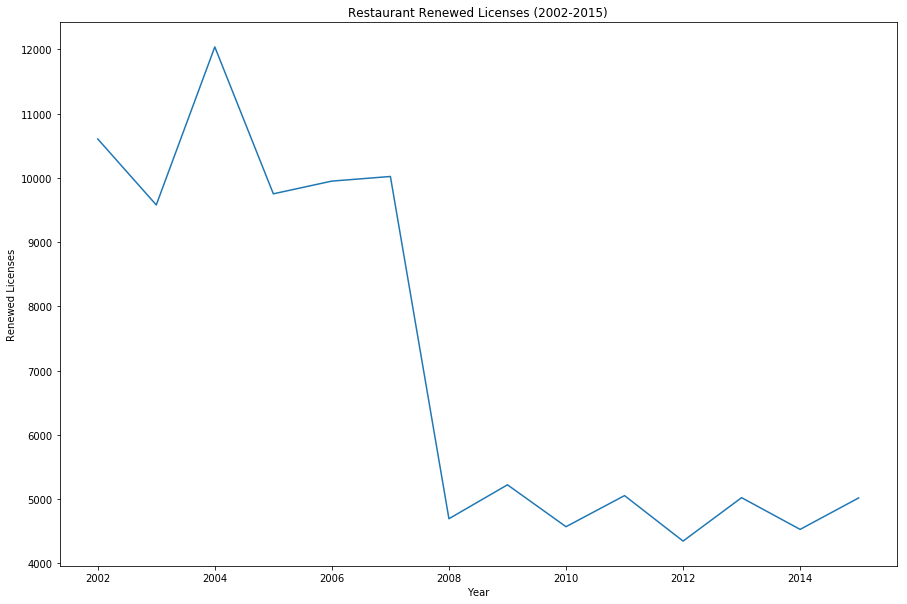

In [14]:
rcParams['figure.figsize'] = 15,10
licenses_renew = renew.groupby(["YEAR"]).count()
plt.plot("WARD", data= licenses_renew)
plt.xlabel('Year')
plt.ylabel('Renewed Licenses')
plt.title('Restaurant Renewed Licenses (2002-2015)')

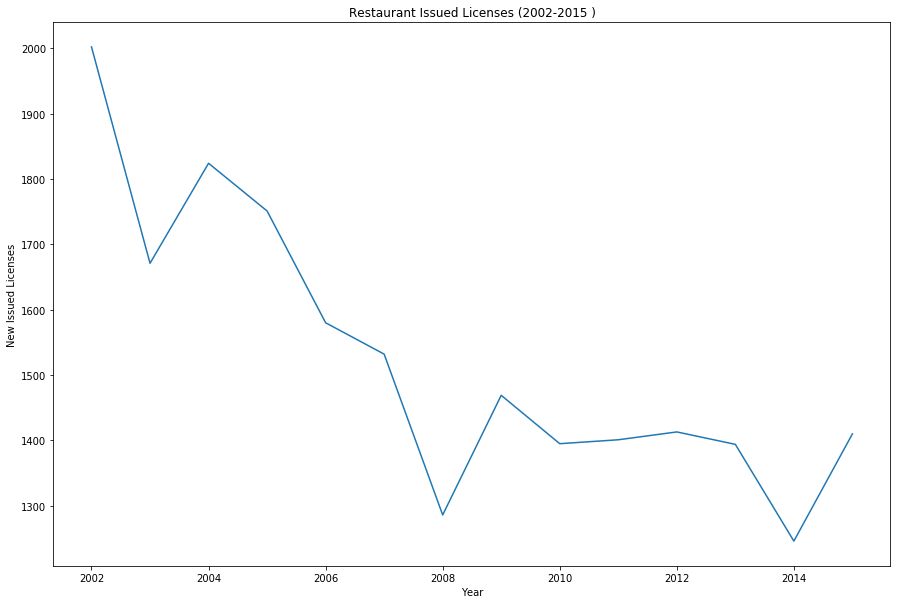

In [15]:
rcParams['figure.figsize'] = 15,10
licenses_issue = issue.groupby(["YEAR"]).count()
plt.plot("WARD", data= licenses_issue)
plt.xlabel('Year')
plt.ylabel('New Issued Licenses')
plt.title('Restaurant Issued Licenses (2002-2015 )')
plt.savefig('New_Restaurants_Liceneses_Issued.png')

In [16]:
df_3.head()

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE,YEAR
0,23031.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #216,1006,RENEW,CHICAGO,42.0,60611,03/18/2015,41.893341,-87.617589,2015
1,1573094.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #9426,1006,RENEW,CHICAGO,1.0,60642,03/18/2015,41.891770,-87.658605,2015
2,1124102.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #2510,1006,RENEW,CHICAGO,42.0,60610,03/18/2015,41.889683,-87.637121,2015
3,2253113.0,STARBUCKS CORPORATION,STARBUCKS #17743,1006,RENEW,CHICAGO,40.0,60659,03/18/2015,41.992587,-87.689862,2015
4,2147567.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #22949,1006,ISSUE,CHICAGO,42.0,60604,05/15/2012,41.885802,-87.624660,2012


In [24]:
 Licenses_2015 = df_3[df_3['YEAR'] == 2015]

In [26]:
Licenses_2015

,LICENSE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,LICENSE CODE,APPLICATION TYPE,CITY,WARD,ZIP CODE,DATE ISSUED,LATITUDE,LONGITUDE,YEAR
0,23031.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #216,1006,RENEW,CHICAGO,42.0,60611,03/18/2015,41.893341,-87.617589,2015
1,1573094.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #9426,1006,RENEW,CHICAGO,1.0,60642,03/18/2015,41.891770,-87.658605,2015
2,1124102.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #2510,1006,RENEW,CHICAGO,42.0,60610,03/18/2015,41.889683,-87.637121,2015
3,2253113.0,STARBUCKS CORPORATION,STARBUCKS #17743,1006,RENEW,CHICAGO,40.0,60659,03/18/2015,41.992587,-87.689862,2015
5,2089469.0,STARBUCKS CORPORATION,STARBUCKS COFFEE #15683,1006,RENEW,CHICAGO,42.0,60602,03/18/2015,41.882288,-87.624518,2015
8,2341107.0,STARBUCKS CORPORATION,Starbucks Coffee #22423,1006,RENEW,CHICAGO,2.0,60610,03/18/2015,41.904831,-87.635028,2015
11,1144381.0,PRESENCE CHICAGO HOSPITALS NETWORK,PRESENCE SAINT JOSEPH HOSPITAL - CHICAGO,1006,RENEW,CHICAGO,44.0,60657,02/13/2015,41.934403,-87.636806,2015
33,51614.0,"MADELINE KHAN, LTD.",VINCENT,1006,RENEW,CHICAGO,48.0,60640,07/16/2015,41.979744,-87.667738,2015
126,1596518.0,"INSPIRATION CORPORATION, CHICAGO",Inspiration Kitchens Uptown,1006,RENEW,CHICAGO,46.0,60640,06/25/2015,41.967761,-87.654658,2015
148,2269934.0,BONNE VIE ENTERTAINMENT CORP.,FLEETWOOD RESTAURANT,1006,RENEW,CHICAGO,3.0,60616,11/16/2015,41.850118,-87.623589,2015


In [27]:
Licenses_2015.shape

(6485, 12)

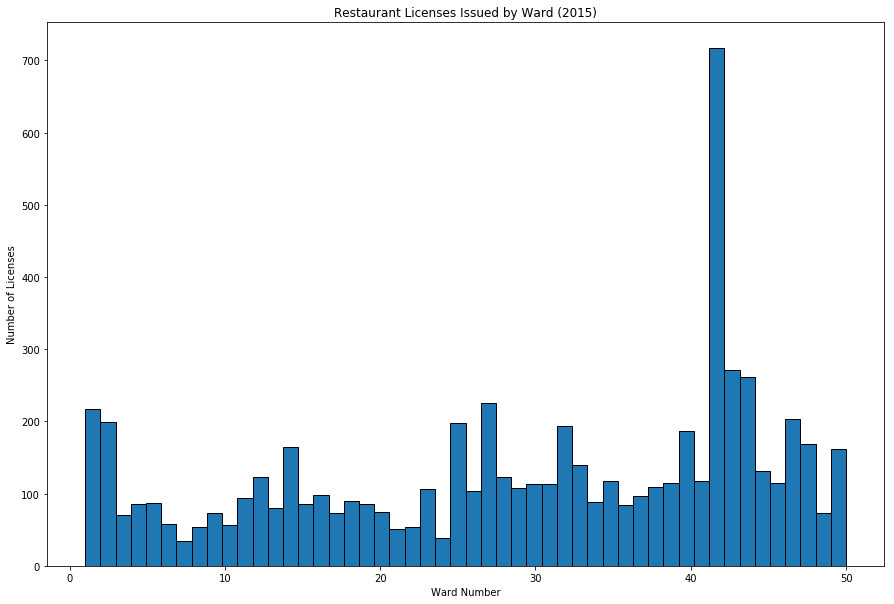

In [29]:
rcParams['figure.figsize'] = 15,10
WARD = Licenses_2015['WARD']

plt.hist(WARD, 50)

plt.xlabel('Ward Number')
plt.ylabel('Number of Licenses')
plt.title('Restaurant Licenses Issued by Ward (2015)')
plt.savefig('Restaurant_Licenses_Distribution_by_Ward_2015.png')

In [30]:
Licenses_2015.to_csv('Licenses_2015_Chicago.csv')